In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import PowerTransformer

In [2]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# print top 5 rows (not in book)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

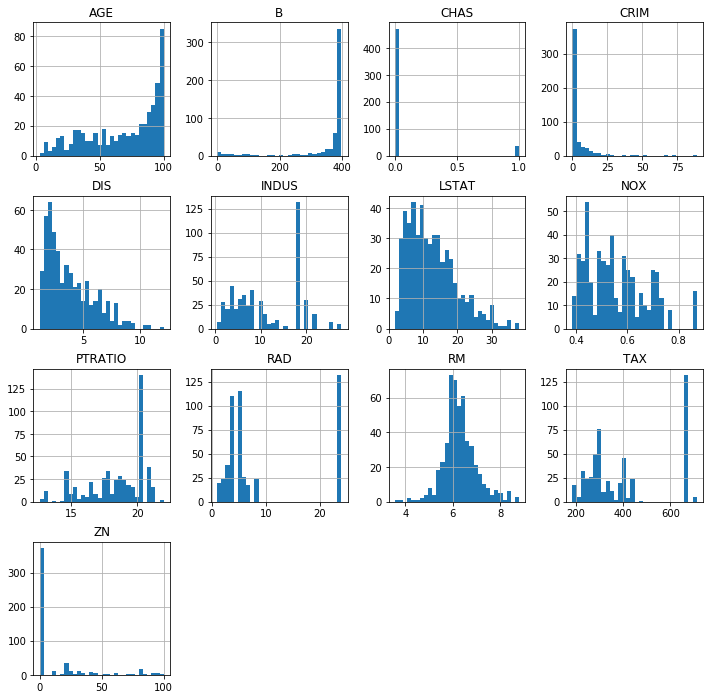

In [3]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# (not in this recipe of the book)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

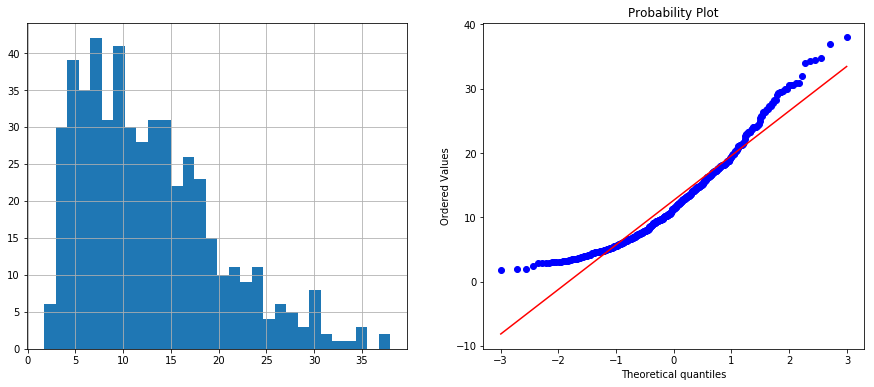

In [5]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(data, 'LSTAT')

## Exponential transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [7]:
# apply a 0.3 exponent power transformation to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.power(data[['LSTAT', 'NOX', 'DIS', 'RM']], 0.3)

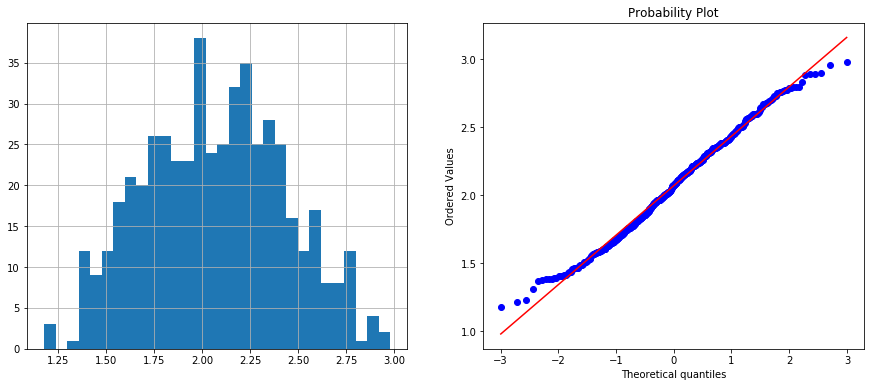

In [8]:
# visuallize the transformation (not included in recipe)

diagnostic_plots(data_tf, 'LSTAT')

## Exponential transformation with Scikit-learn

In [9]:
# initialize the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3), validate=True)

In [10]:
# capture variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
data_tf = transformer.transform(data[cols])

In [11]:
# capture returned NumPy array into a dataframe

data_tf = pd.DataFrame(data_tf, columns=cols)

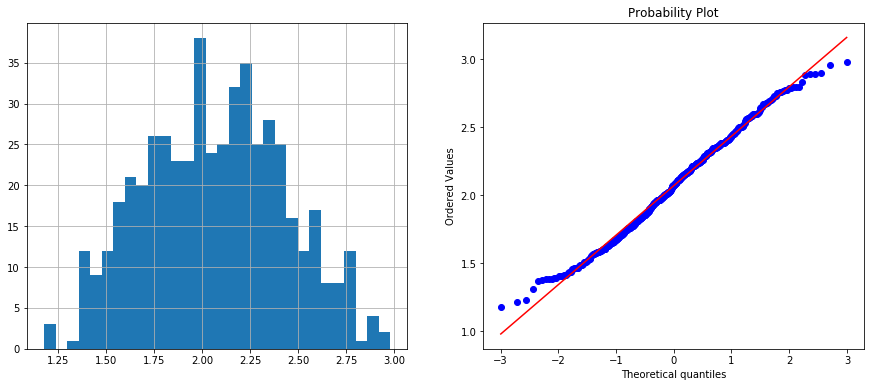

In [12]:
# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Exponential transformation with Feature-engine

In [13]:
# initialize the transformer with the variables to transform and 
# the desired exponent

et = PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp=0.3)

# fit transformer to data
et.fit(data)

PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [14]:
# transform indicated variables in the dataset
data_tf = et.transform(data)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


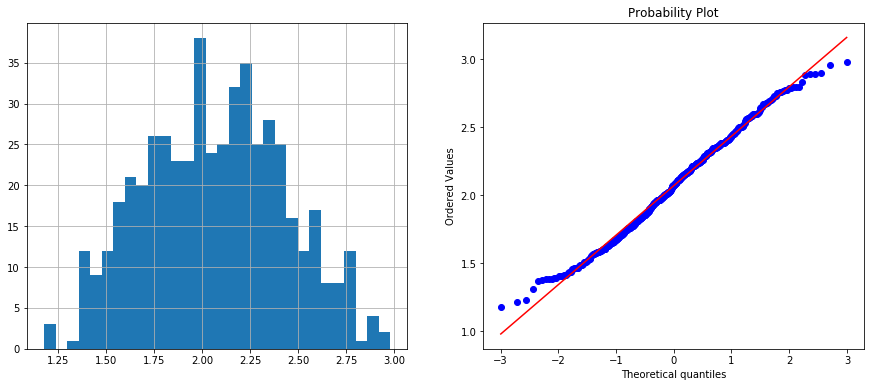

In [15]:
# plot transform variable
diagnostic_plots(data_tf, 'LSTAT')

## There is more
### Not included in the book

Apply different power transformations to different set of features using Feature-engine

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
pipe = Pipeline([
    ('power1', PowerTransformer(variables = ['LSTAT', 'NOX'], exp=0.3)),    
    ('power2', PowerTransformer(variables = ['DIS'], exp=0.4)),
    ('power3', PowerTransformer(variables = ['RM'], exp=0.5)),
     ])

In [18]:
pipe.fit(data)

Pipeline(memory=None,
         steps=[('power1',
                 PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX'])),
                ('power2', PowerTransformer(exp=0.4, variables=['DIS'])),
                ('power3', PowerTransformer(exp=0.5, variables=['RM']))],
         verbose=False)

In [19]:
data_tf = pipe.transform(data)